In [1]:
import setup
import numpy as np
from matplotlib import pyplot as plt
import importlib
np.set_printoptions(precision=3, suppress=True)
# finalized libs
from tight_binding_redweasel import kpaths
from tight_binding_redweasel.symmetry import *
from tight_binding_redweasel.unitary_representations import *
from tight_binding_redweasel.tight_binding import *
from tight_binding_redweasel import bandstructure
UR = UnitaryRepresentation
# not finalized libs
from tight_binding_redweasel import fermi_surface as fs
importlib.reload(fs)
from tight_binding_redweasel import density_of_states as dos
importlib.reload(dos);

# Tests

In [2]:
test_d3 = UR.d3(True)
#print(*list(test_d3.U), sep="\n")
test_o3 = UR.so3()
#print(test_o3.U)
test_i = UR.one_dim(True, True, True)
test_combined = test_d3 + test_o3 + test_i
#print(test_combined.sym.S[:4])
print(np.real(test_combined.U[:4]))

[[[ 1.     0.     0.     0.     0.     0.   ]
  [ 0.     1.     0.     0.     0.     0.   ]
  [ 0.     0.     1.     0.     0.     0.   ]
  [ 0.     0.     0.     1.     0.     0.   ]
  [ 0.     0.     0.     0.     1.     0.   ]
  [ 0.     0.     0.     0.     0.     1.   ]]

 [[ 1.     0.     0.     0.     0.     0.   ]
  [ 0.     0.     1.     0.     0.     0.   ]
  [ 0.    -1.     0.     0.     0.     0.   ]
  [ 0.     0.     0.     1.     0.     0.   ]
  [ 0.     0.     0.     0.    -1.     0.   ]
  [ 0.     0.     0.     0.     0.    -1.   ]]

 [[ 0.     0.    -1.     0.     0.     0.   ]
  [ 0.     1.     0.     0.     0.     0.   ]
  [ 1.     0.     0.     0.     0.     0.   ]
  [ 0.     0.     0.    -0.5    0.866  0.   ]
  [ 0.     0.     0.     0.866  0.5    0.   ]
  [ 0.     0.     0.     0.     0.    -1.   ]]

 [[ 0.     1.     0.     0.     0.     0.   ]
  [-1.     0.     0.     0.     0.     0.   ]
  [ 0.     0.     1.     0.     0.     0.   ]
  [ 0.     0.     0.    -0.5

In [3]:
# test gradients
#u_repr = UnitaryRepresentation(Symmetry.cubic(True), 3)
u_repr = UR.one_dim(False, False, True) + UR.d3(False)
#u_repr = URep.o3()
u_repr.check()
tb2 = TightBindingModel(u_repr, ((0,0,0), (1,0,0), (0,1,0), (0,0,1)),
                        [random_hermitian(3),
                         random_hermitian(3),
                         random_hermitian(3),
                         random_hermitian(3)])
tb2.normalize()
print(tb2.params)

# test symmetry of bands and hamilton operator
u_repr.sym.check_symmetry(lambda k: tb2.bands(np.reshape(k, (-1, 3))))
u_repr.check_symmetry(lambda k: tb2.f(np.reshape(k, (-1, 3)))[0])

h = 1e-7
k_smpl = np.random.random((30, 3))
dx = np.reshape((h, 0, 0), (1, -1))
dy = np.reshape((0, h, 0), (1, -1))
dz = np.reshape((0, 0, h), (1, -1))

# test gradients
bands, grads = tb2.bands_grad(k_smpl)
bandsx = tb2.bands(k_smpl + dx)
bandsy = tb2.bands(k_smpl + dy)
bandsz = tb2.bands(k_smpl + dz)
# the following should be of order h
print(np.linalg.norm(bands + (grads * dx.reshape(1,-1,1)).sum(1) - bandsx) / h)
print(np.linalg.norm(bands + (grads * dy.reshape(1,-1,1)).sum(1) - bandsy) / h)
print(np.linalg.norm(bands + (grads * dz.reshape(1,-1,1)).sum(1) - bandsz) / h)

# test hessians
k_smpl = np.random.random((30, 3))
bands, grads, hess = tb2.bands_grad_hess(k_smpl)
#print(np.linalg.norm(hess, axis=(0, -1)))
bandsx, gradsx = tb2.bands_grad(k_smpl + dx)
bandsy, gradsy = tb2.bands_grad(k_smpl + dy)
bandsz, gradsz = tb2.bands_grad(k_smpl + dz)
# the following should be of order h
print(np.linalg.norm(grads + hess[:,:,0]*h - gradsx, axis=(0,2)) / h)
print(np.linalg.norm(grads + hess[:,:,1]*h - gradsy, axis=(0,2)) / h)
print(np.linalg.norm(grads + hess[:,:,2]*h - gradsz, axis=(0,2)) / h)


[[[ 1.932+0.j     0.   -0.j    -0.   +0.j   ]
  [ 0.   +0.j    -0.383+0.j    -0.   -0.j   ]
  [-0.   -0.j    -0.   +0.j    -0.383+0.j   ]]

 [[-0.413+0.j    -0.096+0.364j  0.   +0.j   ]
  [-0.096-0.364j  1.337-0.j     0.   -0.j   ]
  [ 0.   -0.j     0.   +0.j     0.445+0.j   ]]

 [[-0.413+0.j     0.048-0.182j  0.083-0.315j]
  [ 0.048+0.182j  0.668-0.j     0.386-0.j   ]
  [ 0.083+0.315j  0.386+0.j     1.114+0.j   ]]

 [[-0.413+0.j     0.048-0.182j -0.083+0.315j]
  [ 0.048+0.182j  0.668+0.j    -0.386-0.j   ]
  [-0.083-0.315j -0.386+0.j     1.114-0.j   ]]]
symmetry error
[0 1 1]
1.1753032210567503e-05
1.139697843942679e-05
9.995488521290766e-06
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]


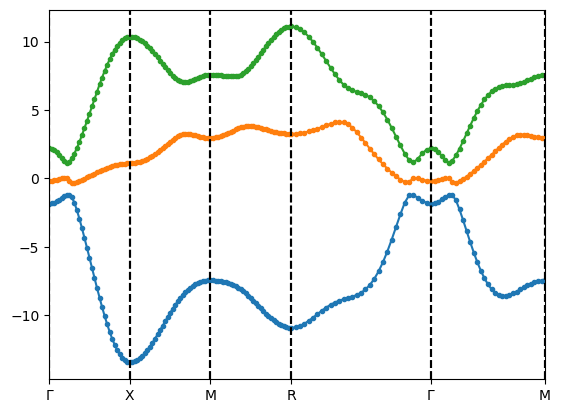

In [4]:
# compare the old BandStructureModel with the new TightBinding class
# they should be equivalent for the trivial unitary representation
u_repr = UR.one_dim(False, False, True) * 3
neighbors = ((0,0,0), (1,0,0), (1,1,0), (1,1,1))#, (2,0,0), (2,1,0), (2,1,1), (2,2,1), (2,2,0), (2,2,2), (3,0,0), (3,1,0), (3,1,1), (3,2,1))
neighbors_compl = u_repr.sym.complete_neighbors(neighbors)
# post processing to find the connection to the bandstructure model
neighbors_compl_tup = [tuple(n) for n in neighbors_compl]
indices = np.array([neighbors_compl_tup.index(n) for n in neighbors])
classes = u_repr.sym.find_classes(neighbors_compl)
neighbors_classes = [next((c for c in classes.values() if i in c)) for i in indices]
neighbors_class_sizes = np.array([len(c) for c in neighbors_classes])
#print(neighbors_class_sizes)

tb2 = TightBindingModel(u_repr, neighbors_compl,
                        [random_hermitian(u_repr.dim()) for _ in neighbors_compl])
tb2.normalize()

# NOTE the TightBindingModel is always cos_reduced = True
band_model = bandstructure.BandStructureModel.init_tight_binding_from_ref(u_repr.sym, neighbors, [[0, 0, 0]], [np.diag(tb2.params[0])], 0, 0, cos_reduced=True)
neighbors_class_sizes[0] = 24
band_model.params = np.array(tb2.params[indices]) * neighbors_class_sizes[:,None,None] / 24

#print(np.linalg.eigvalsh(band_model.params[0]))
#print(band_model([[0, 0, 0]]))
#print(tb2([[0, 0, 0]]))
#print(band_model.params[0])
#print(band_model.f([[0, 0, 0]]))
#print(tb2.f([[0, 0, 0]]))

# just plot a path to get good readable plots
path = kpaths.KPath('G').to('X').to('M').to('R').to('G').to('M')
path.plot(tb2, '.')
path.plot(band_model, '-')

[[[ 0.611+0.j    -0.314+0.381j  0.698-0.865j]
  [-0.314-0.381j -0.122+0.j    -0.786-0.509j]
  [ 0.698+0.865j -0.786+0.509j  0.217+0.j   ]]

 [[ 1.971+0.j     0.333+0.05j  -1.108-1.061j]
  [ 0.333-0.05j   1.966+0.j    -1.237-0.478j]
  [-1.108+1.061j -1.237+0.478j  1.647+0.j   ]]

 [[-0.467+0.j    -0.704-0.186j -1.357+0.002j]
  [-0.704+0.186j  1.615+0.j     0.057+0.979j]
  [-1.357-0.002j  0.057-0.979j  0.875+0.j   ]]]
final loss: 3.94e-03
final loss: 0.0039383889358325826
[[[ 0.505+0.j    -0.727+0.649j -0.06 +0.289j]
  [-0.727-0.649j  1.233+0.j     0.176-0.322j]
  [-0.06 -0.289j  0.176+0.322j -1.014+0.j   ]]

 [[ 1.107+0.j     0.809+0.197j  0.554+1.044j]
  [ 0.809-0.197j  2.741-0.j     0.41 +0.395j]
  [ 0.554-1.044j  0.41 -0.395j  1.744+0.j   ]]

 [[-0.153+0.j     1.133-0.153j  0.447-0.093j]
  [ 1.133+0.153j  0.362-0.j    -0.36 -0.864j]
  [ 0.447+0.093j -0.36 +0.864j  1.813+0.j   ]]]


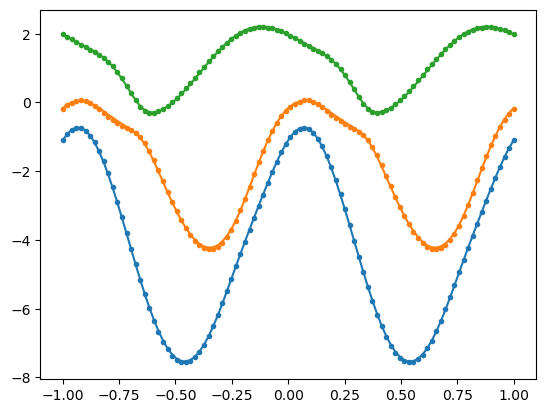

In [5]:
# TODO do this test for non matching unitary representations
# NOTE the following does sometimes not converge for unknown reasons, but that was already in v2 that way
u_repr = UnitaryRepresentation(Symmetry.one_dim(False), 3)
tb2 = TightBindingModel(u_repr, ((0,), (1,)),
                        [random_hermitian(3),
                         random_hermitian(3),
                         random_hermitian(3)])

tb2_ref = TightBindingModel(u_repr, ((0,), (1,)),
                        [random_hermitian(3),
                         random_hermitian(3),
                         random_hermitian(3)])
tb2_ref.normalize()
print(tb2_ref.params)

k_smpl = np.linspace(-1, 1, 100).reshape(-1, 1)

ref_bands = tb2_ref.bands(k_smpl)
tb2.optimize(k_smpl, 1, ref_bands, [1, 1, 1], 0, 1000)
print("final loss:", tb2.loss(k_smpl, ref_bands, [1, 1, 1], 0))
print(tb2.params)

tb2_ref.plot_bands(k_smpl, '.')
tb2.plot_bands(k_smpl, '-')

[[[ 0.415+0.j     0.   +0.j     0.   +0.j   ]
  [ 0.   +0.j    -1.616+0.j    -0.445-0.707j]
  [ 0.   +0.j    -0.445+0.707j  0.219+0.j   ]]

 [[ 1.473+0.j    -0.918-0.757j  0.632+0.671j]
  [-0.918+0.757j  1.724+0.j    -0.27 -1.06j ]
  [ 0.632-0.671j -0.27 +1.06j  -0.685+0.j   ]]]
final loss: 3.38e-03
final loss: 0.003376167321548648
[[[ 0.402+0.j     0.   +0.j     0.   +0.j   ]
  [ 0.   +0.j    -1.464+0.j    -0.992-0.024j]
  [ 0.   +0.j    -0.992+0.024j  0.076-0.j   ]]

 [[ 1.447+0.j     0.285-0.442j -0.95 -0.874j]
  [ 0.285+0.442j  0.774-0.j     0.434-1.436j]
  [-0.95 +0.874j  0.434+1.436j  0.305+0.j   ]]]


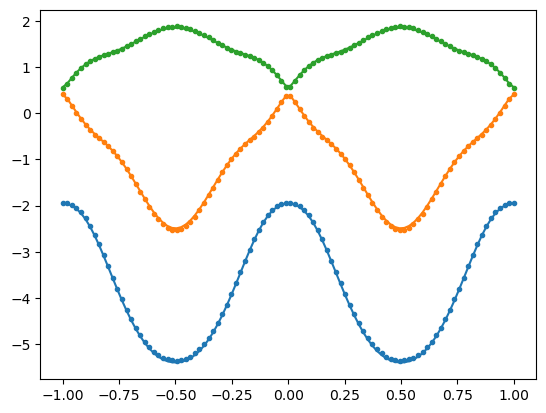

In [6]:
# TODO do this test for non matching unitary representations
# NOTE the following does sometimes not converge for unknown reasons, but that was already in v2 that way
u_repr = UnitaryRepresentation(Symmetry.one_dim(True), 3)
u_repr.inv_split = 1
tb2 = TightBindingModel(u_repr, ((0,), (1,)),
                        [random_hermitian(3)*0.1,
                         random_hermitian(3)*0.1])

tb2_ref = TightBindingModel(u_repr, ((0,), (1,)),
                        [random_hermitian(3),
                         random_hermitian(3)])
tb2_ref.normalize()
print(tb2_ref.params)

k_smpl = np.linspace(-1, 1, 100).reshape(-1, 1)

ref_bands = tb2_ref.bands(k_smpl)
tb2.optimize(k_smpl, 1, ref_bands, [1, 1, 1], 0, 1000, learning_rate=1.0)
print("final loss:", tb2.loss(k_smpl, ref_bands, [1, 1, 1], 0))
print(tb2.params)

tb2_ref.plot_bands(k_smpl, '.')
tb2.plot_bands(k_smpl, '-')

In [7]:
%load_ext snakeviz

u_repr = UR.d3(False)# + UR.one_dim(True, True, True)
neighbors = u_repr.sym.complete_neighbors(((0,0,0), (1,0,0)))
tb2_ref = TightBindingModel(u_repr, neighbors,
                        [random_hermitian(u_repr.dim()) for _ in neighbors])
tb2_ref.normalize()
print(tb2_ref.params)
#tb2_ref.normalize()
#print(tb2_ref.params)

[[[ 1.767-0.j  0.   +0.j]
  [ 0.   +0.j  1.767-0.j]]

 [[-1.338-0.j  0.   -0.j]
  [ 0.   +0.j -0.385+0.j]]

 [[-0.623+0.j -0.413-0.j]
  [-0.413+0.j -1.1  -0.j]]

 [[-0.623+0.j  0.413-0.j]
  [ 0.413+0.j -1.1  -0.j]]]


final loss: 9.62e-04


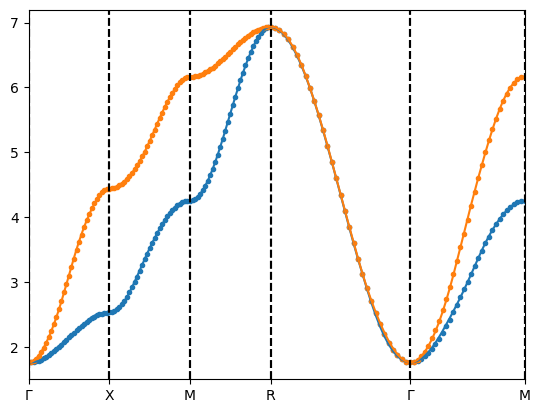

In [8]:
#%%snakeviz -t
# TODO do this test for non matching unitary representations
# NOTE the following does sometimes not converge for unknown reasons, but that was already in v2 that way
u_repr_fit = UR.one_dim(False, False, True) * u_repr.dim()
neighbors_fit = ((0,0,0), (1,0,0), (1,1,0), (1,1,1), (2,0,0), (2,1,0), (2,1,1), (2,2,1), (2,2,0), (2,2,2), (3,0,0), (3,1,0), (3,1,1), (3,2,1))
neighbors_fit_compl = u_repr.sym.complete_neighbors(neighbors_fit)

tb2 = TightBindingModel(u_repr_fit, neighbors_fit_compl,
                        [random_hermitian(u_repr.dim()) * 0.01 for _ in neighbors_fit_compl])

# just fit along a path to get good readable plots
path = kpaths.KPath('G').to('X').to('M').to('R').to('G').to('M')
k_smpl = np.array(path)/2

ref_bands = tb2_ref.bands(k_smpl)

# test the old model in comparison (performance and fit quality)
#tb2 = bandstructure.BandStructureModel.init_tight_binding_from_ref(u_repr.sym, neighbors_fit, k_smpl, ref_bands, 0, 0, cos_reduced=False)

# fit
tb2.optimize(k_smpl, 1.0, ref_bands, 1.0, 0, 2000, batch_div=4)

path.plot(tb2_ref, '.')
path.plot(tb2, '-')

In [9]:
for i, (r, mat) in enumerate(zip(neighbors_fit_compl + neighbors_fit_compl[1:], tb2.params)):
    print(r, np.linalg.norm(mat), "real" if np.linalg.norm(np.imag(mat)) < 1e-8 else "complex")

[0 0 0] 2.4988722809844366 complex
[1 0 0] 1.2185570745020804 complex
[0 1 0] 1.2185570745020804 complex
[0 0 1] 1.2185570745020804 complex
[ 1  0 -1] 0.18192816349755547 complex
[ 0  1 -1] 0.18192816349755547 complex
[ 1 -1  0] 0.18192816349755547 complex
[1 1 0] 0.18192816349755547 complex
[1 0 1] 0.18192816349755547 complex
[0 1 1] 0.18192816349755547 complex
[ 1 -1 -1] 0.034780968040087686 complex
[ 1  1 -1] 0.034780968040087686 complex
[ 1 -1  1] 0.034780968040087686 complex
[1 1 1] 0.034780968040087686 complex
[2 0 0] 0.17483837884111075 complex
[0 2 0] 0.17483837884111075 complex
[0 0 2] 0.17483837884111075 complex
[ 1  0 -2] 0.013998116427403015 complex
[ 0  1 -2] 0.013998116427403015 complex
[ 2  0 -1] 0.013998116427403015 complex
[ 0  2 -1] 0.013998116427403015 complex
[ 1 -2  0] 0.013998116427403015 complex
[ 2 -1  0] 0.013998116427403015 complex
[2 1 0] 0.013998116427403015 complex
[1 2 0] 0.013998116427403015 complex
[2 0 1] 0.013998116427403015 complex
[0 2 1] 0.013998116

# Real Data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import importlib
np.set_printoptions(precision=3, suppress=True)
# finalized libs
from tight_binding_redweasel import kpaths
from tight_binding_redweasel.symmetry import *
from tight_binding_redweasel.unitary_representations import *
from tight_binding_redweasel.tight_binding import *
UR = UnitaryRepresentation
# not finalized libs
from tight_binding_redweasel import fermi_surface as fs
importlib.reload(fs)
from tight_binding_redweasel import density_of_states as dos
importlib.reload(dos);

using 12  data bands
using 14  model bands
unique band energies: 6
irreducible symmetry sizes (data):  {1: 2, 2: 2, 3: 2}
irreducible symmetry sizes (model): {1: 1, 2: 2, 3: 3}
ordered degeneracies:
data:  [1, 2, 3, 2, 3, 1]
model: [1, 2, 3, 2, 3, 3]
loss: 7.91e-02
aborted
final loss: 4.72e-02
final loss: 3.09e-02


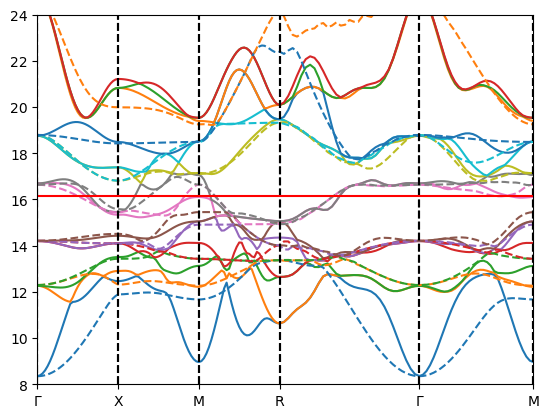

In [2]:
# sc crystal
basis_transform = np.eye(3)
# bcc crystal
#basis_transform = np.array([[-1, 1, 1], [1, -1, 1], [1, 1, -1]]) / 2.0
# fcc crystal
#basis_transform = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]]) / 2.0

#u_repr = UR.one_dim(False, False, True) * 9
#u_repr = UR.one_dim(False, False, True)*6 + UR.o3() # error still goes down well
#u_repr = UR.one_dim(False, True, True)*3 + UR.o3() * 2 # good looking/expressive fermi surface
#u_repr = UR.one_dim(False, True, True) + UR.o3()*2 + UR.d3(False) # better than 9*s
#u_repr = (UR.one_dim(True, True, True) + UR.one_dim(False, False, True) + UR.o3() + UR.so3() + UR.d3(False)) * 2
#u_repr = UR.one_dim(False, False, True) + UR.so3() * 2 + UR.d3(False) * 2 + UR.o3()
u_repr = UR.one_dim(False, False, True) + UR.d3(False) + UR.so3() + UR.d3(False) + UR.so3() + UR.o3()
band_offset = 0 # = additional bands below reference

#neighbor_R = ((0, 0, 0), (1, 0, 0), (1, 1, 0), (1, 1, 1), (2, 0, 0), (2, 1, 0), (2, 1, 1), (2, 2, 1), (2, 2, 2), (3, 0, 0)) # works well
#neighbor_R = ((0,0,0), (1,0,0))
#neighbor_R = ((0,0,0), (1,0,0), (1,1,0), (1,1,1))
#neighbor_R = ((0,0,0), (1,0,0), (1,1,0), (1,1,1), (2,0,0))
neighbor_R = ((0,0,0), (1,0,0), (1,1,0), (1,1,1), (2,0,0), (2,1,0), (2,1,1), (2,2,1), (2,2,0))
#neighbor_R = ((0,0,0), (1,0,0), (1,1,0), (1,1,1), (2,0,0), (2,1,0), (2,1,1), (2,2,1), (2,2,0), (2,2,2), (3,0,0), (3,1,0), (3,1,1), (3,2,1))
neighbor_R = u_repr.sym.complete_neighbors(neighbor_R)
neighbor_R = (basis_transform @ np.asarray(neighbor_R).T).T

from tight_binding_redweasel import qespresso_interface as qe
material = qe.from_disk("nitinol_0K")
k_smpl, ref_bands, symmetries, fermi_energy = material.read_bands_crystal()
ref_weights = Symmetry(symmetries).k_weight(k_smpl)
all_ref_bands = ref_bands
ref_bands = ref_bands[:,8:]

# now start my algorithm to find good matrices

weights = np.ones(len(ref_bands[0]))
weights[0] = 0.005
weights[1] = 0.005
weights[2] = 0.05
weights[3] = 0.5
weights[-1] = 0.005
weights[-2] = 0.05
weights[-3] = 0.5

print("using", len(ref_bands[0]), " data bands")
print("using", len(u_repr.U[0]), " model bands")

tb_nitinol = TightBindingModel.init_from_ref(u_repr, neighbor_R, k_smpl, ref_bands, use_repr_order=True, verbose=True)
#print(np.real(np.diag(tb_nitinol.f([(0,0,0)])[0])))
#print(ref_bands[0])
# optimize the region around k=0 and the high symmetry parts to get started
ref_weights = ref_weights / np.max(ref_weights)
sym_weights = 1 / ref_weights
select = sym_weights > 1.5
# preparation in hopes it will give better chance of convergence
#tb_nitinol.optimize(k_smpl[select], sym_weights[select], ref_bands[select], 1, band_offset, 500, batch_div=4, train_k0=False)
#tb_nitinol.optimize(k_smpl, ref_weights, ref_bands, 1, band_offset, 500, batch_div=8, train_k0=False)
#tb_nitinol.optimize(k_smpl[select], sym_weights[select], ref_bands[select], weights, band_offset, 100, batch_div=4, train_k0=False)

# now fully optimize
tb_nitinol.optimize(k_smpl, ref_weights, ref_bands, weights, band_offset, 1000, batch_div=4, train_k0=False)
# now also let the k=0 point free to get overall better error bounds
tb_nitinol.optimize(k_smpl, ref_weights, ref_bands, weights, band_offset, 100, batch_div=1, train_k0=True)

path = kpaths.KPath('G').to('X').to('M').to('R').to('G').to('M')
interpolator = kpaths.interpolate(k_smpl, ref_bands, Symmetry.cubic(True), method='cubic')
path.plot(tb_nitinol, '-')
path.plot(interpolator, '--')
plt.axhline(fermi_energy, color="r")
plt.ylim(8, 24)
plt.show()

In [3]:
#tb_nitinol.params = tb_nitinol.unitary_repr.symmetrize(tb_nitinol.params, tb_nitinol.neighbors)
assert tb_nitinol.unitary_repr.check_symmetry(tb_nitinol.f)
for i, (r, mat) in enumerate(zip(list(neighbor_R) + list(neighbor_R)[1:], tb_nitinol.params)):
    print(r, np.linalg.norm(mat), "real" if np.linalg.norm(np.imag(mat)) < 1e-8 else "complex")

[0. 0. 0.] 66.624960613163 complex
[1. 0. 0.] 1.726917913392257 complex
[0. 1. 0.] 1.7269179133922568 complex
[0. 0. 1.] 1.7269179133922565 complex
[ 1.  0. -1.] 1.1552488500596945 complex
[ 0.  1. -1.] 1.1552488500596942 complex
[ 1. -1.  0.] 1.1552488500596942 complex
[1. 1. 0.] 1.1552488500596945 complex
[1. 0. 1.] 1.1552488500596945 complex
[0. 1. 1.] 1.1552488500596942 complex
[ 1. -1. -1.] 0.6725942523131572 complex
[ 1.  1. -1.] 0.6725942523131571 complex
[ 1. -1.  1.] 0.6725942523131573 complex
[1. 1. 1.] 0.6725942523131573 complex
[2. 0. 0.] 0.7345424858877448 complex
[0. 2. 0.] 0.7345424858877448 complex
[0. 0. 2.] 0.7345424858877447 complex
[ 1.  0. -2.] 0.5761528399434552 complex
[ 0.  1. -2.] 0.5761528399434552 complex
[ 2.  0. -1.] 0.5761528399434552 complex
[ 0.  2. -1.] 0.5761528399434552 complex
[ 1. -2.  0.] 0.5761528399434552 complex
[ 2. -1.  0.] 0.5761528399434552 complex
[2. 1. 0.] 0.5761528399434552 complex
[1. 2. 0.] 0.5761528399434552 complex
[2. 0. 1.] 0.57615

In [14]:
bands = tuple(np.round(tb_nitinol.bands([(0.5, 0.5, 0.5)])[0], 4))
# best order (-87.103, -47.555, -47.555, -47.555, -40.737, -16.949, -16.949, -16.949, 8.35, 12.296, 12.296, 14.212, 14.212, 14.212, 16.636, 16.636, 18.793, 18.793, 18.793, 24.807)
# question: what makes this order special in terms of the fermi surface having the gap that is often missing?
print(bands)
unique = set(bands)
print("unique values:", len(unique))
print("1-sym:", len([b for b in unique if len([1 for b2 in bands if b2 == b]) == 1]))
print("2-sym:", len([b for b in unique if len([1 for b2 in bands if b2 == b]) == 2]))
print("3-sym:", len([b for b in unique if len([1 for b2 in bands if b2 == b]) == 3]))

(13.1256, 13.4216, 13.4216, 14.0176, 14.0176, 14.0176, 14.9817, 14.9817, 19.5202, 19.5202, 19.5202, 24.7524, 24.7524, 24.7524)
unique values: 6
1-sym: 1
2-sym: 2
3-sym: 3


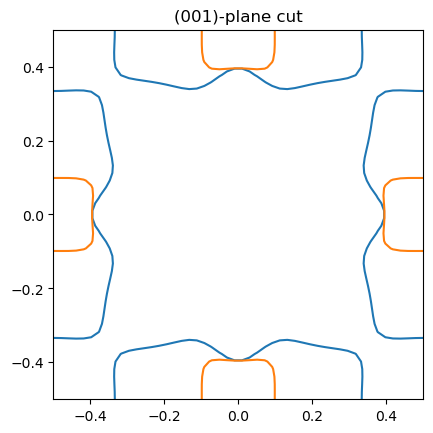

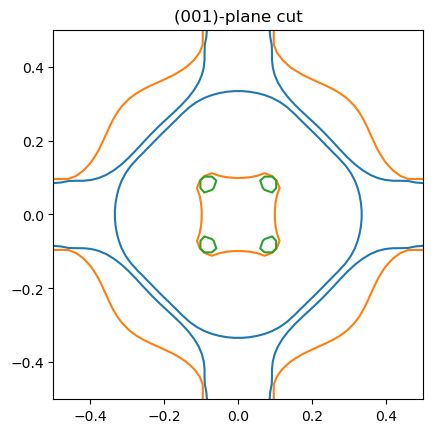

In [12]:
# 107 Czycholl (4.53) -> Symmetrie
# 2d fermi surface cuts
fs.plot_2D_fermi_surface(tb_nitinol, fermi_energy, N=50)

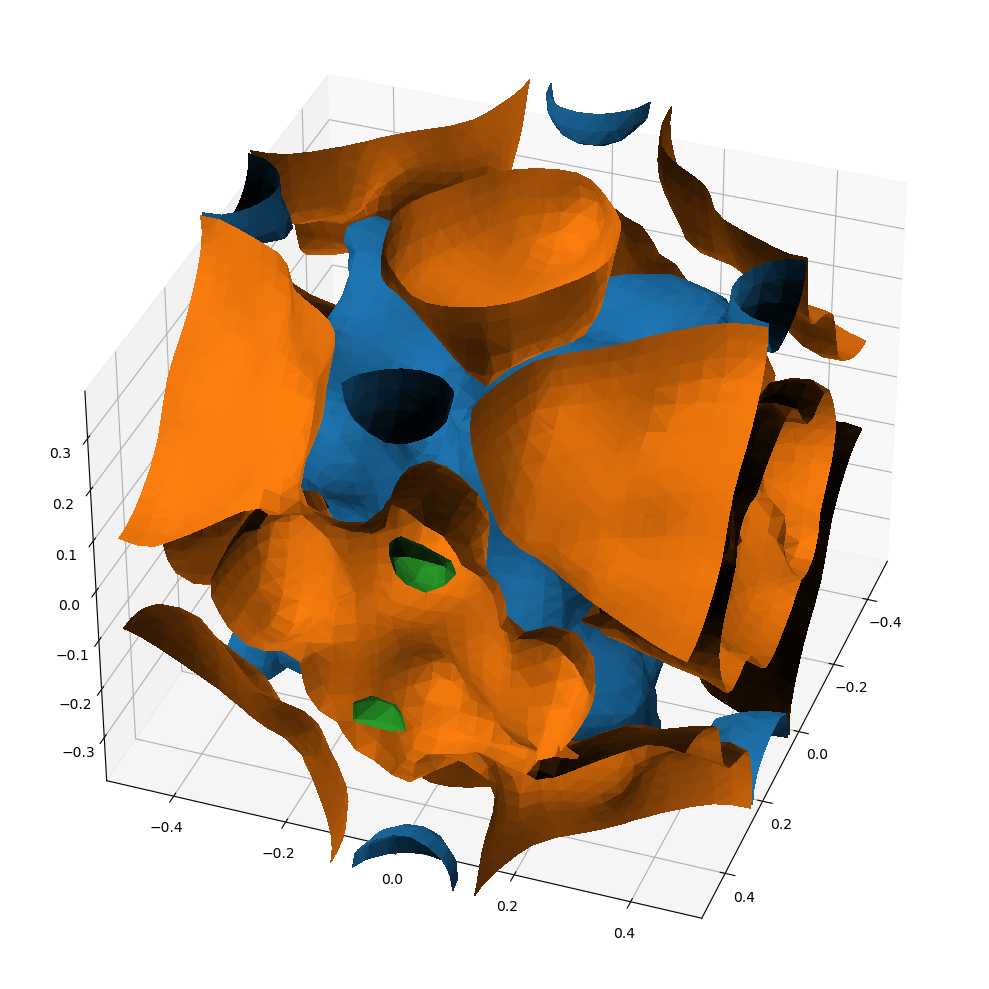

In [16]:
# plot the fermi surface
fs.plot_3D_fermi_surface(tb_nitinol, fermi_energy, N=32)